In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
path = '../1_data_preprocessing\cleaned_sample_1000.csv'
df = pd.read_csv(path)
df.head()

,ID,Name,Age,Gender,Salary,Joining Date,Comments,IsActive_0,IsActive_1
0,1,Paul,25,0,90041.86,2017-01-31,Creative,True,False
1,2,Paul,31,1,90285.02,2019-05-29,Needs Improvement,True,False
2,3,Rachel,30,1,84321.65,2022-12-14,Hardworking,True,False
3,4,Bob,45,1,68189.99,2023-09-05,Fast Learner,False,True
4,5,Eve,34,1,35428.35,2018-05-19,Dedicated,False,True


In [3]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Salary', 'Joining Date', 'Comments',
       'IsActive_0', 'IsActive_1'],
      dtype='object')

**select numeric columns**

In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('ID')
numeric_cols.remove('Gender')
print(numeric_cols)

['Age', 'Salary']


**Define features (X) and target (y)**

In [5]:
X = df[['Age']]
y = df[['Salary']]

**split the data into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**create and fit the model**

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**predict on testing data**

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(y_pred[5])

[74910.35171962]


In [10]:
y_test.head(1)


,Salary
521,94855.87


**visualizing the prediction**

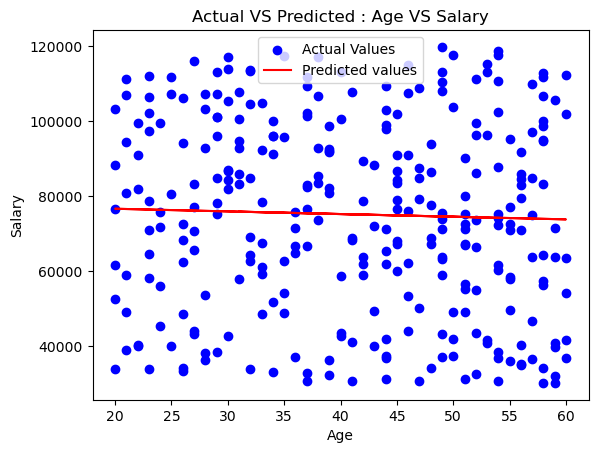

In [11]:
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Actual VS Predicted : Age VS Salary')
plt.legend()
plt.show()

**display model coefficients**

In [12]:
print("Model Coefficients: ")
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Model Coefficients: 
Intercept: [78099.31734166]
Coefficient: [-70.86590271]


In [16]:
new_ages = pd.DataFrame({'Age': [20,22,24,26,28,30,32,34,36,38,40]})
new_pred = model.predict(new_ages)
for age, salary in zip(new_ages['Age'], new_pred):
    print(f'Age: {age}, Salary: {salary}')

Age: 20, Salary: [76681.99928742]
Age: 22, Salary: [76540.267482]
Age: 24, Salary: [76398.53567657]
Age: 26, Salary: [76256.80387115]
Age: 28, Salary: [76115.07206572]
Age: 30, Salary: [75973.3402603]
Age: 32, Salary: [75831.60845488]
Age: 34, Salary: [75689.87664945]
Age: 36, Salary: [75548.14484403]
Age: 38, Salary: [75406.4130386]
Age: 40, Salary: [75264.68123318]
